In [12]:
import pandas as pd

# Load data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')



In [13]:
# Merge transaction data with customer data
transactions_with_customers = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

# Aggregate transaction data at the customer level
customer_transaction_features = transactions_with_customers.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'nunique'),
    num_products=('ProductID', 'nunique'),
    average_transaction_value=('TotalValue', 'mean'),
    region=('Region', 'first')  # Assume region is consistent for each customer
).reset_index()

# Preview the aggregated customer transaction features
customer_transaction_features.head()


,CustomerID,total_spent,num_transactions,num_products,average_transaction_value,region
0,C0001,3354.52,5,5,670.904,South America
1,C0002,1862.74,4,4,465.685,Asia
2,C0003,2725.38,4,4,681.345,South America
3,C0004,5354.88,8,8,669.360,South America
4,C0005,2034.24,3,3,678.080,Asia


In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features into numerical and categorical
numerical_features = ['total_spent', 'num_transactions', 'num_products', 'average_transaction_value']
categorical_features = ['region']

# Create the preprocessing pipeline: scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ]
)

# Apply the transformations
X = preprocessor.fit_transform(customer_transaction_features)


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Choose the number of clusters (try different values between 2 and 10)
n_clusters = 5  # You can try different values here

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_transaction_features['Cluster'] = kmeans.fit_predict(X)

# Calculate the Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(X, customer_transaction_features['Cluster'])

# Show the clustering results
print(f"Number of clusters: {n_clusters}")
print(f"Davies-Bouldin Index: {db_index}")


Number of clusters: 5
Davies-Bouldin Index: 1.4150377882809324


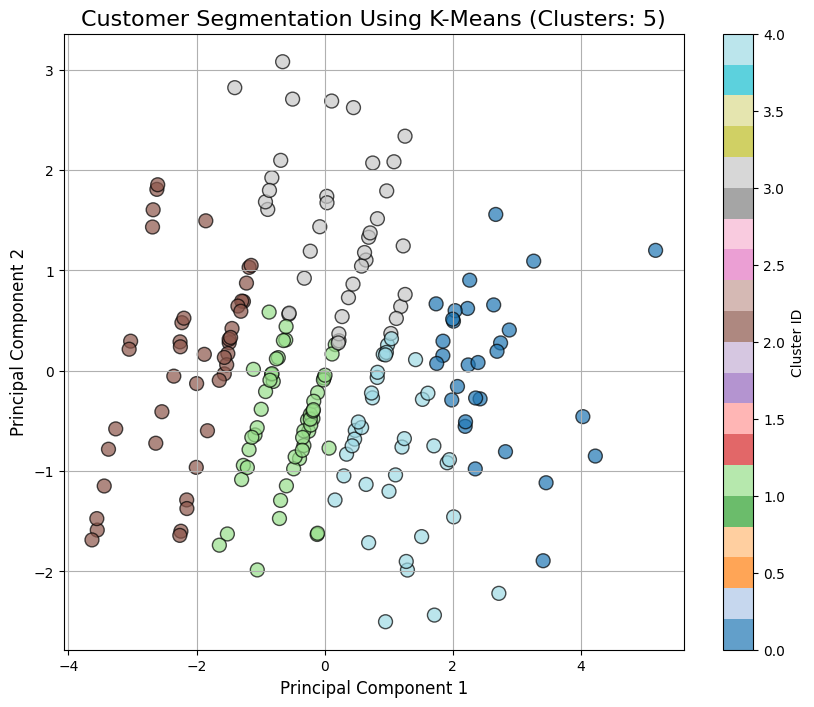

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for 2D visualization (reduce the dimensionality to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters with enhanced readability
plt.figure(figsize=(10, 8))

# Scatter plot with clusters color-coded
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_transaction_features['Cluster'], cmap='tab20', s=100, alpha=0.7, edgecolors='k')

# Add title and labels
plt.title(f'Customer Segmentation Using K-Means (Clusters: {n_clusters})', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Add color bar to indicate the cluster number
plt.colorbar(scatter, label='Cluster ID')

# Display grid lines for better visual alignment
plt.grid(True)

# Show the plot
plt.show()


In [18]:
from sklearn.metrics import silhouette_score

# Cluster distribution
cluster_counts = customer_transaction_features['Cluster'].value_counts()

# Display the clustering summary
print(f"Cluster Distribution:\n{cluster_counts}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")



Cluster Distribution:
Cluster
1    51
2    44
3    38
4    36
0    30
Name: count, dtype: int64
Davies-Bouldin Index: 1.4150377882809324
Silhouette Score: 0.2021115166241109
